# Problem Statement: Stock Price Prediction

Stock prices are determined by a wide array of factors:
1.The performance of companies, trends in the market
2.Economic indicators
3.Investor sentiment and
4.Even geopolitical events.
Thus, the accurate prediction of stock prices becomes crucial not only for investors, 
portfolio managers, but also financial institutions trying to maximize yield while mitigating risks and ensuring informed trading decisions.

# Step 1 :Import Libraries

In [107]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


 # Step 2 : Load Dataset

In [109]:
dataset = pd.read_csv(r"C:\Users\akshi\OneDrive\Desktop\codeunnati\Stockpriceprediction\GOOG.csv")

In [111]:
#dataset head
dataset.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [163]:
#info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [113]:
#dataset shape
dataset.shape

(1258, 14)

In [159]:
#summary of dataset
dataset.describe(include='all')

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258,1258,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
unique,1,1258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GOOG,2016-06-14 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1258,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,NaN,NaN,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,NaN,NaN,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,NaN,NaN,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,NaN,NaN,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,NaN,NaN,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0


In [157]:
#datatype of columns in dataset
dataset.dtypes

symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

# Step 3 : Data Preprocessing 


In [115]:
# Check for missing values
dataset.isnull().sum() 

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [117]:
#Removing Unwanted Columns
data_cleaned = dataset.drop(columns=['symbol', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'])
data_cleaned.head()

,date,close,high,low,open,volume
0,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065
1,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517
2,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471
3,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357
4,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538


# Step 4: Exploratory Data Analysis

### 1.Pairplot

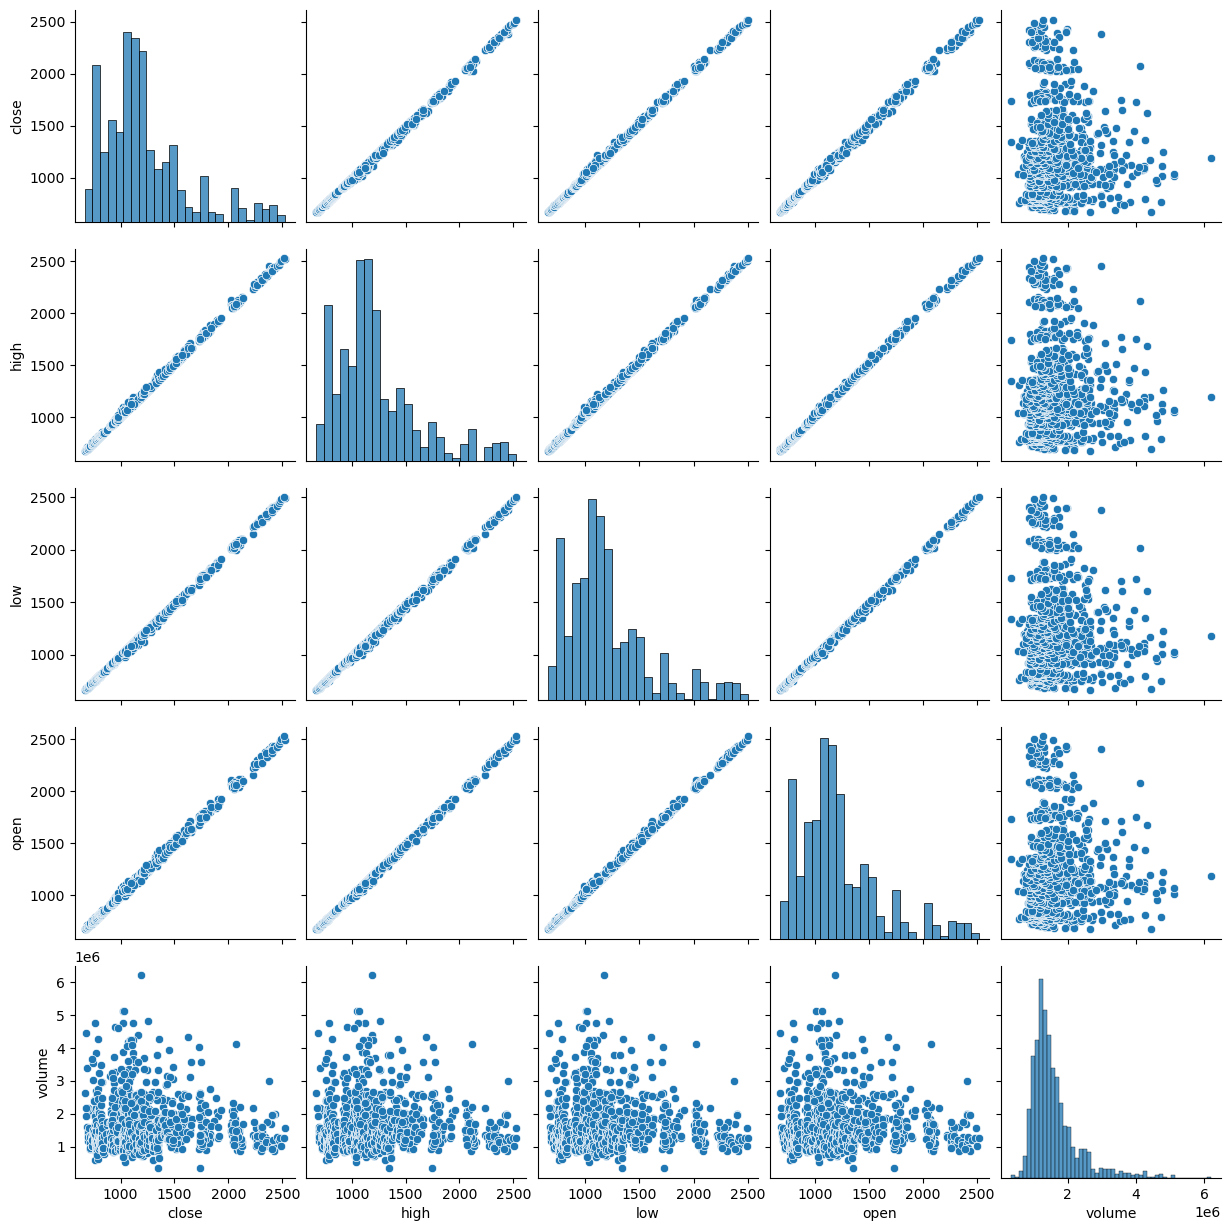

In [119]:
# Visualize Whole Data set
sns.pairplot(data_cleaned)

### 2.BOXPLOT

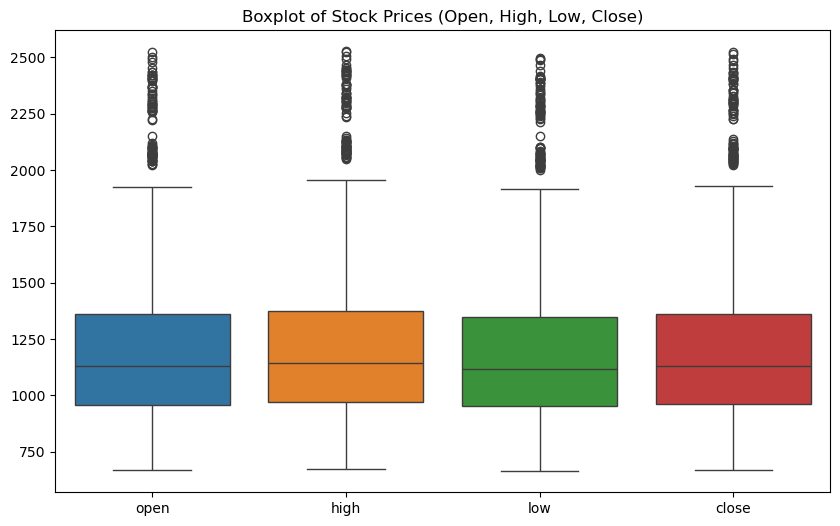

In [120]:
# Boxplot for multiple columns ('open', 'high', 'low', 'close')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned[['open', 'high', 'low', 'close']])
plt.title('Boxplot of Stock Prices (Open, High, Low, Close)')
plt.show()


### 3.HISTOGRAMS

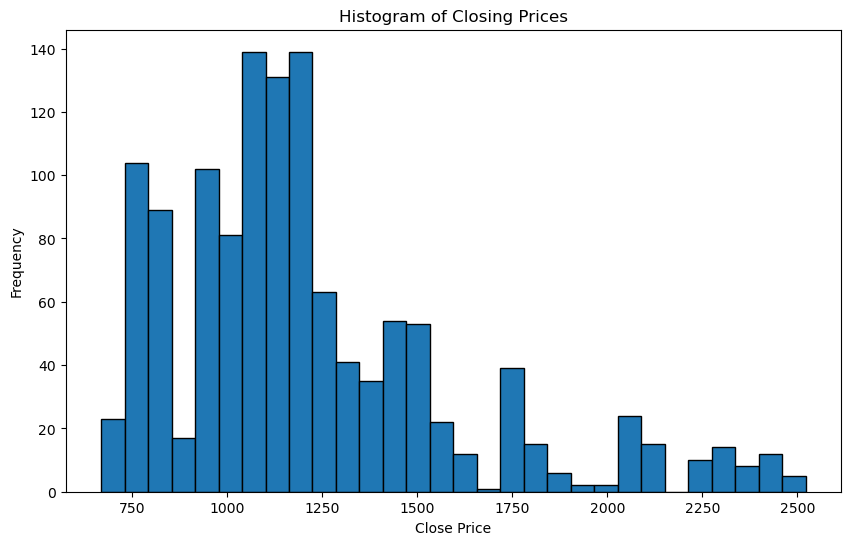

In [77]:
# Histogram for 'close' prices
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['close'], bins=30, edgecolor='black')
plt.title('Histogram of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


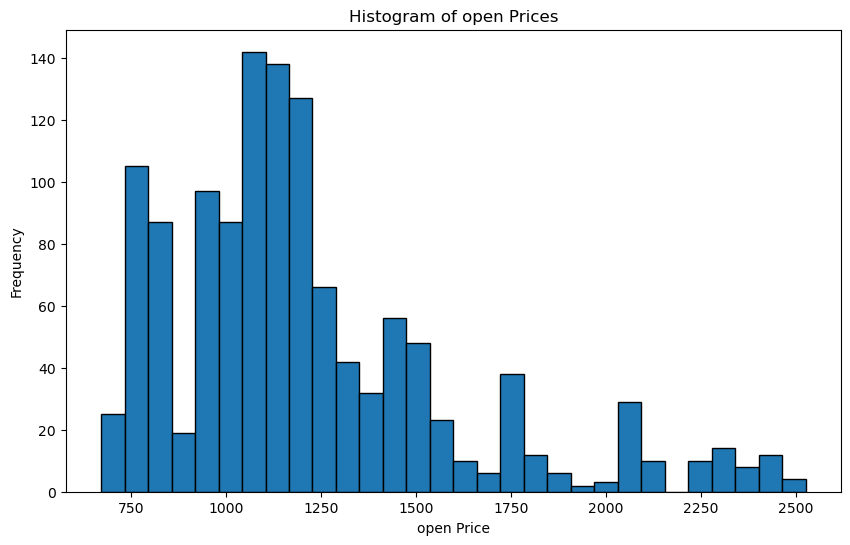

In [121]:
# Histogram for 'opem' prices
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['open'], bins=30, edgecolor='black')
plt.title('Histogram of open Prices')
plt.xlabel('open Price')
plt.ylabel('Frequency')
plt.show()


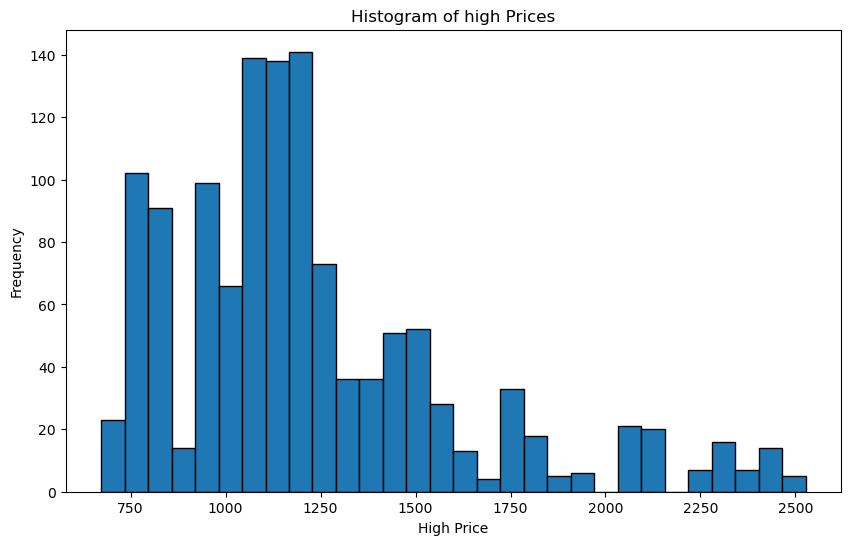

In [79]:
# Histogram for 'high' prices
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['high'], bins=30, edgecolor='black')
plt.title('Histogram of high Prices')
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.show()


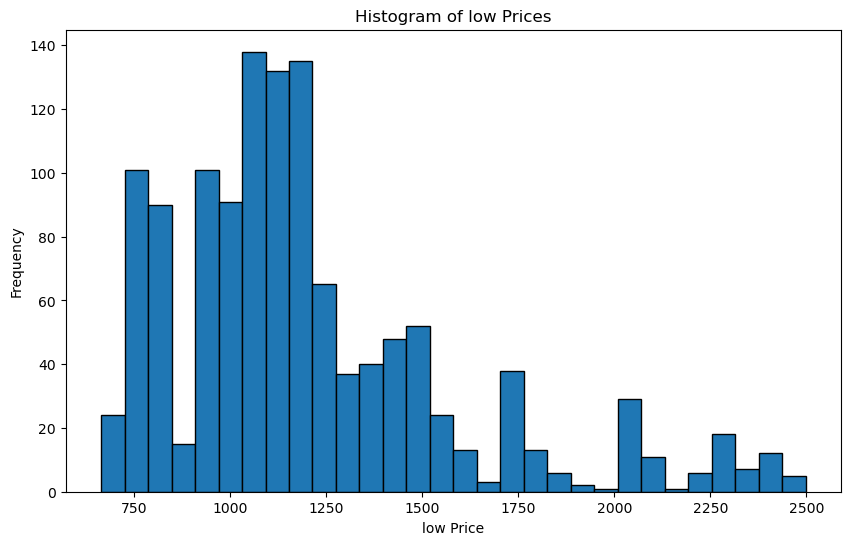

In [122]:
# Histogram for 'low' prices
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['low'], bins=30, edgecolor='black')
plt.title('Histogram of low Prices')
plt.xlabel('low Price')
plt.ylabel('Frequency')
plt.show()


### 4.SCATTERPLOT

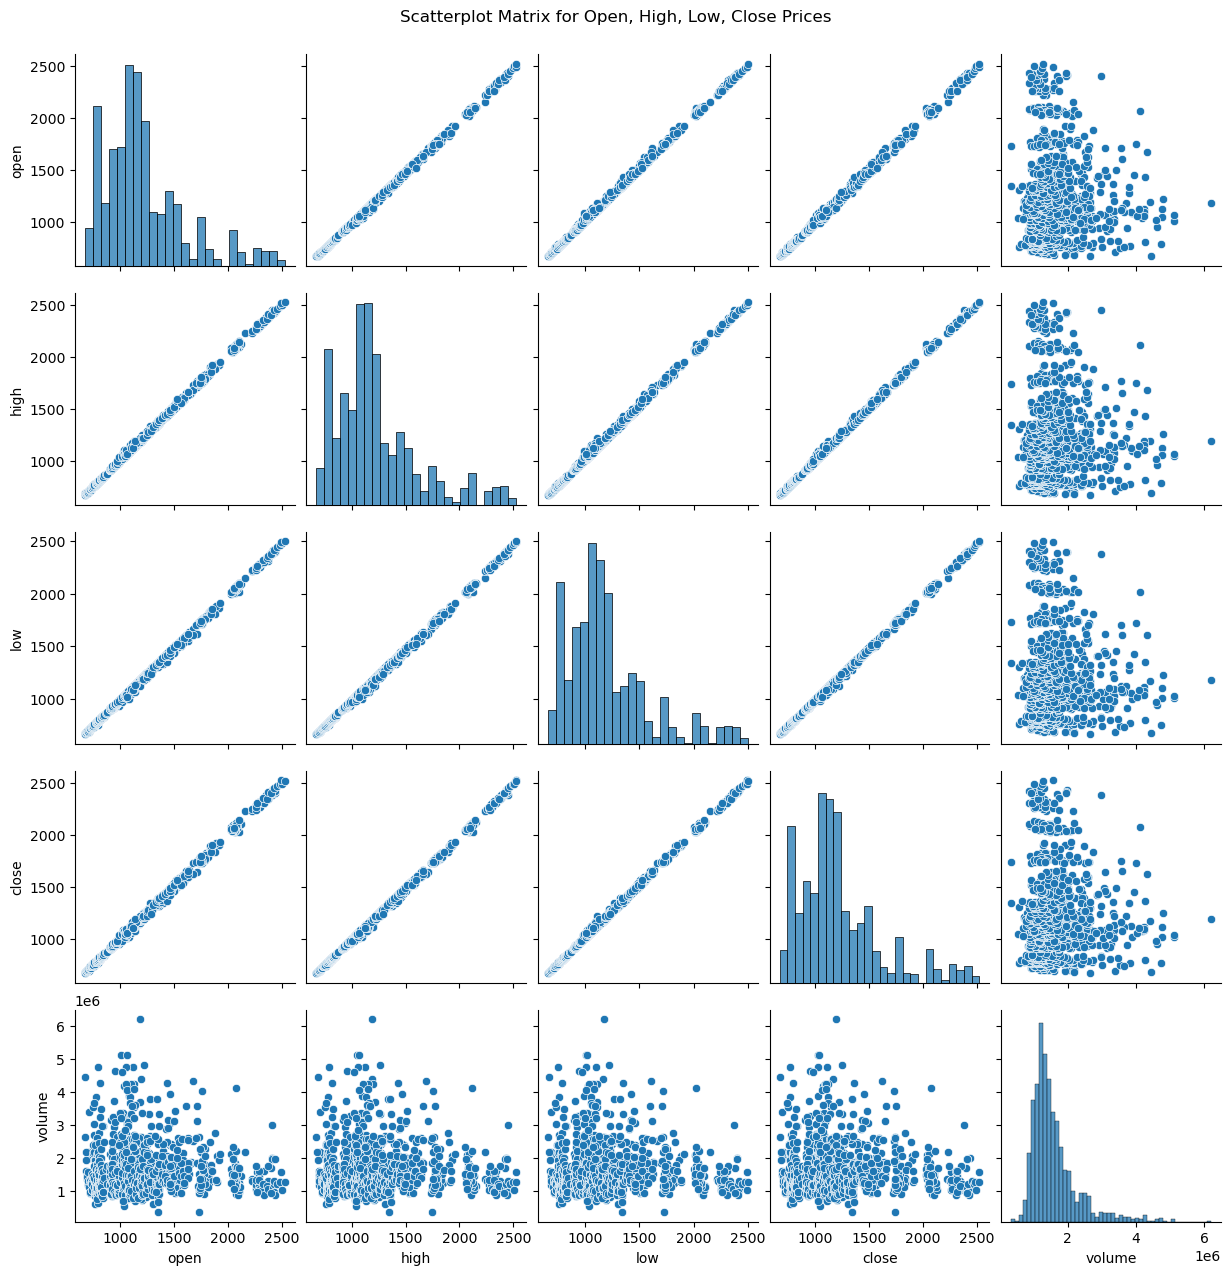

In [129]:
#  scatterplots between 'open', 'high', 'low', 'close' and 'volume'
sns.pairplot(data_cleaned[['open', 'high', 'low', 'close','volume']])
plt.suptitle('Scatterplot Matrix for Open, High, Low, Close Prices', y=1.02)
plt.show()


### 5.CORELATION HEATMAP

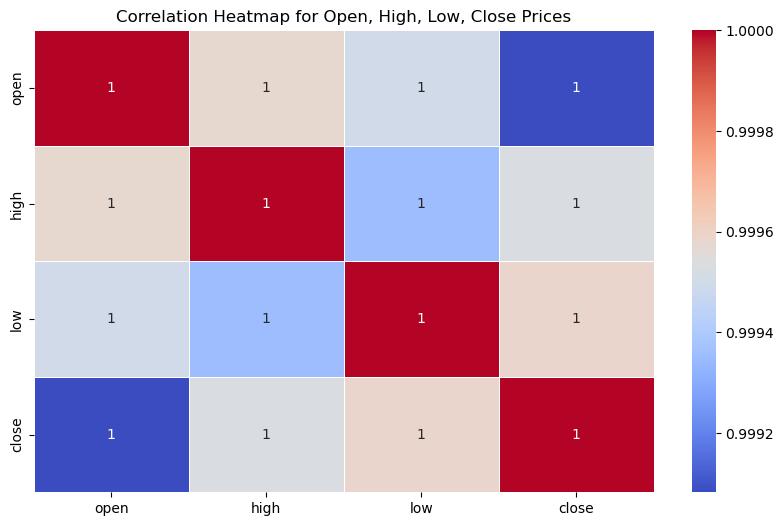

In [130]:
# Correlation heatmap for 'open', 'high', 'low', and 'close' prices
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned[['open', 'high', 'low', 'close']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Open, High, Low, Close Prices')
plt.show()


# Step 5 : Feature Engineering

In [86]:
# Normalize the features using StandardScaler to improve algorithm performance 
scaler = StandardScaler()
#date column cannot be scaled as it is in date format
#scaled_data = scaler.fit_transform(data_cleaned)
# Exclude the date index and only scale numerical features
numerical_columns = ['close', 'high', 'low', 'open', 'volume']
scaled_data = scaler.fit_transform(data_cleaned[numerical_columns])
# Convertion of  scaled data back into a DataFrame
data_scaled = pd.DataFrame(scaled_data, columns=numerical_columns, index=data_cleaned.index)
data_scaled.head()

,close,high,low,open,volume
0,-1.299770,-1.303405,-1.296941,-1.304701,-0.424763
1,-1.298074,-1.302088,-1.285875,-1.298110,-0.556347
2,-1.320413,-1.318427,-1.322983,-1.308808,0.547447
3,-1.369058,-1.338638,-1.362094,-1.325183,2.588274
4,-1.363865,-1.355003,-1.348998,-1.351027,0.691275


Note :-
Not used MinMaxscaler  because : This scaler transforms the data to a [0, 1] range but is sensitive to outliers. 
In stock price data, we might have sudden spikes, and also StandardScaler is less affected by outliers than MinMaxScaler.

# Step 6 : Divide the Data into X and Y variables 

In [89]:

X = data_scaled.drop(columns=['close'])  # Features: Open , high , low 
Y = data_scaled['close']  # Target: 'close' price


# Step 7 : Split the data set into Train and Test data 

In [91]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Step 8 : Train the Model using different ML algorithms 

### 1.Simple linear Regression

In [94]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

### 2.Decision Tree Regressor

In [96]:
DT =  DecisionTreeRegressor(max_depth=5,max_leaf_nodes=10)
model=DT.fit(X_train,Y_train)
model



DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10)

### Visualize the decision tree

In [161]:

#plt.figure(figsize=(20,10))
#tree.plot_tree(model, filled=True)
#plt.title("Decision Tree")
#plt.show()

### 3.KNeighborsRegressor

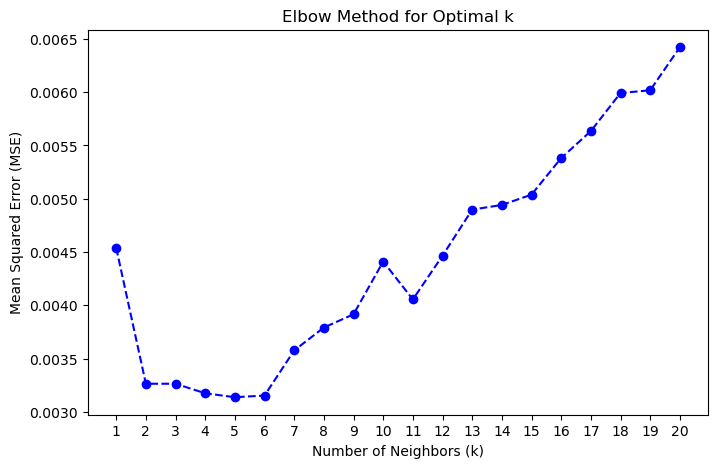

In [133]:
# Define a range of k values to test
k_values = range(1, 21)
mse_values = []  # Store the Mean Squared Error for each k

# Loop through k values and train the KNN model for each one
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    
    # Predict on the test set
    Y_pred = knn.predict(X_test)
    
    # Calculate Mean Squared Error and store it
    mse = mean_squared_error(Y_test, Y_pred)
    mse_values.append(mse)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()


In [135]:
KNN = KNeighborsRegressor(n_neighbors=6)
KNN.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=6)

### 4.Support Vector Machine (SVM) Regressor

In [137]:
#The parameter kernel='rbf' in SVR (Support Vector Regression) refers to the Radial Basis Function (RBF) kernel
#Meaning of RBF Kernel:
#The RBF kernel measures the similarity between two data points based on their distance. 
#If two points are close to each other, the similarity is high. If they are far apart, the similarity decreases exponentially.
SVM = SVR(kernel='rbf')
SVM.fit(X_train, Y_train)

SVR()

### 5. Random Forest Regressor

In [139]:
RFR = RandomForestRegressor(n_estimators=100, random_state=42)
#This parameter "n_estimators " specifies the number of trees in the forest.
#More trees can improve the model’s performance but also increase training time.
RFR.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

# Step 9 : prediction of data 

### 1.Simple linear Regression

In [141]:
regressor_Y_pred = regressor.predict(X_test)
calculation = pd.DataFrame(np.c_[Y_test,regressor_Y_pred], columns = ["Original Price","Predicted price"])
calculation

,Original Price,Predicted price
0,-0.077867,-0.114405
1,-1.185594,-1.175734
2,-1.166308,-1.168497
3,-1.191675,-1.191565
4,0.728671,0.700706
...,...,...
247,-1.002573,-1.007615
248,-0.040078,-0.050199
249,-0.289151,-0.297226
250,-0.650781,-0.656581


### 2.Decision Tree Regressor

In [143]:
DT_Y_pred = DT.predict(X_test)
calculation = pd.DataFrame(np.c_[Y_test,DT_Y_pred], columns = ["Original Price","Predicted price"])
calculation


,Original Price,Predicted price
0,-0.077867,-0.196158
1,-1.185594,-1.130407
2,-1.166308,-1.130407
3,-1.191675,-1.130407
4,0.728671,0.781145
...,...,...
247,-1.002573,-1.130407
248,-0.040078,0.031746
249,-0.289151,-0.196158
250,-0.650781,-0.711360


### 3.KNeighborsRegressor

In [145]:
KNN_Y_pred = KNN.predict(X_test)
calculation = pd.DataFrame(np.c_[Y_test,KNN_Y_pred], columns = ["Original Price","Predicted price"])
calculation

,Original Price,Predicted price
0,-0.077867,-0.098497
1,-1.185594,-1.123648
2,-1.166308,-1.145030
3,-1.191675,-1.160254
4,0.728671,0.723156
...,...,...
247,-1.002573,-1.003252
248,-0.040078,-0.051622
249,-0.289151,-0.289760
250,-0.650781,-0.664622


### 4.Support Vector Machine (SVM) Regressor

In [147]:
SVM_Y_pred= SVM.predict(X_test)
calculation = pd.DataFrame(np.c_[Y_test,SVM_Y_pred], columns = ["Original Price","Predicted price"])
calculation

,Original Price,Predicted price
0,-0.077867,-0.067004
1,-1.185594,-1.218029
2,-1.166308,-1.161369
3,-1.191675,-1.212289
4,0.728671,0.695361
...,...,...
247,-1.002573,-1.051848
248,-0.040078,-0.017930
249,-0.289151,-0.277621
250,-0.650781,-0.699277


### 5. Random Forest Regressor

In [149]:
RFR_Y_pred = RFR.predict(X_test)
calculation = pd.DataFrame(np.c_[Y_test,RFR_Y_pred], columns = ["Original Price","Predicted price"])
calculation

,Original Price,Predicted price
0,-0.077867,-0.102117
1,-1.185594,-1.187869
2,-1.166308,-1.167033
3,-1.191675,-1.186394
4,0.728671,0.707483
...,...,...
247,-1.002573,-1.000417
248,-0.040078,-0.050054
249,-0.289151,-0.293745
250,-0.650781,-0.642939


# Step 10 : Model Evaluation Matrix

In [151]:


def evaluate_model(Y_test ,Y_pred, model_name):
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    print(f"{model_name} Model Evaluation:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2 Score): {r2}")
    print("\n")

# Evaluate Linear Regression
evaluate_model(Y_test, regressor_Y_pred, "Linear Regression")

# Evaluate Decision Tree
evaluate_model(Y_test, DT_Y_pred, "Decision Tree")

# Evaluate KNN
evaluate_model(Y_test, KNN_Y_pred, "KNN")

# Evaluate SVM
evaluate_model(Y_test, SVM_Y_pred, "SVM")

# Evaluate Random Forest
evaluate_model(Y_test, RFR_Y_pred, "Random Forest")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.000439488866428019
Mean Absolute Error (MAE): 0.013955545697123988
R-squared (R2 Score): 0.9995180954136191


Decision Tree Model Evaluation:
Mean Squared Error (MSE): 0.008584361667780612
Mean Absolute Error (MAE): 0.07493147903033576
R-squared (R2 Score): 0.9905871489021372


KNN Model Evaluation:
Mean Squared Error (MSE): 0.0031525216185329056
Mean Absolute Error (MAE): 0.034618297405205195
R-squared (R2 Score): 0.9965432238614295


SVM Model Evaluation:
Mean Squared Error (MSE): 0.002167653163198064
Mean Absolute Error (MAE): 0.0366748342689616
R-squared (R2 Score): 0.9976231434267762


Random Forest Model Evaluation:
Mean Squared Error (MSE): 0.0007642095534561474
Mean Absolute Error (MAE): 0.018272430475623824
R-squared (R2 Score): 0.9991620354532306


